# ΕΡΓΑΣΙΑ 2

---




# ΜΑΘΗΜΑ ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ
**Ζαχάρη Βάια**
**58161**

# ΑΣΚΗΣΗ 1

Φορτώνουμε τα συνολικά δεδομένα από τον φάκελο του drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/protupa_ergasia2/Data_ex1.txt','r') as file:
  data = file.read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Αποθηκέυουμε σε μεταβλητές τα συνολικά δεδομένα σε  χαρακτηριστικά 1 και 2 όλων των κλάσεων και  σε ετικέτες.

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pdb
import math
from mpl_toolkits.mplot3d import Axes3D
data = np.loadtxt('/content/drive/MyDrive/protupa_ergasia2/Data_ex1.txt', delimiter=',')
num_rows, num_columns = data.shape

x1 = data[:,0]
x2 = data[:,1]
x_total = data[:, :2]
labels = data[:, 2]
#Δεδομένα κάθε κλάσης
x_class_1 = data[data[:, 2] == 1][:, :2]
x_class_2 = data[data[:, 2] == 2][:, :2]
x_class_3 = data[data[:, 2] == 3][:, :2]


**Ερώτημα A**

**Μέθοδος παραθύρων Parzen**

Το Parzen Window είναι μια μέθοδος πυκνότητας πιθανότητας που χρησιμοποιείται στη μη παραμετρική εκτίμηση πυκνότητας πιθανότητας.Tοποθετούμε ένα παράθυρο γύρω από κάθε δείγμα και μετράμε πόσα άλλα δείγματα πέφτουν μέσα σε αυτό. Αν τα δείγματα πέφτουν μέσα στο παράθυρο, τότε αυξάνουμε την πιθανότητα ότι ο χώρος αυτός περιέχει δείγματα από την κατανομή πυκνότητας πιθανότητας.Εδώ τα δείγματα είναι δύο διαστάσεων και άρα η πιθανότητα προκύπτει και από τις δύο διαστάσεις.

Αρχικά, δημιουργούμε ένα grid που καλύπτει τον χώρο όλων των δεδομένων.
Στη συνέχεια, για κάθε κλάση, υπολογίζουμε την PDF με την Parzen window method χρησιμοποιώντας το grid της συγκεκριμένης κλάσης και μετα τις ενώνουμε.


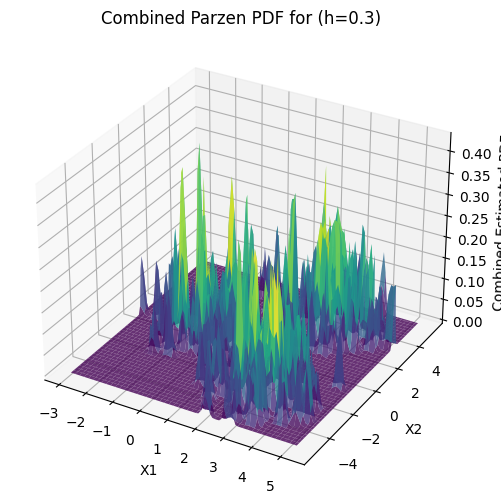

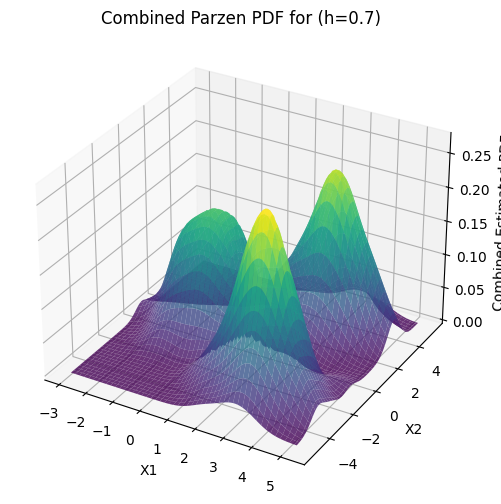

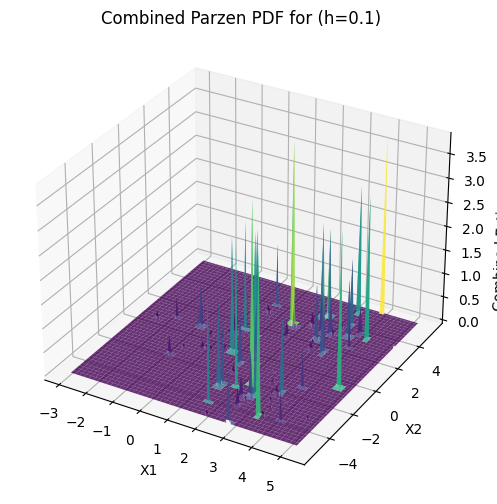

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def parzen_pdf(x_total, x_class, h_n):
    #Όγκος του παραθύρου
    V = h_n**(x_total.shape[1])
    N = len(x_class)
    #Δημιουργία κοινού grid
    xx, yy = np.meshgrid(np.linspace(x_total[:, 0].min(), x_total[:, 0].max(), 100),
                         np.linspace(x_total[:, 1].min(), x_total[:, 1].max(), 100))
    mesh_data = np.column_stack((xx.ravel(), yy.ravel()))
    # Αρχικοποίηση της pdf για την κλάση μεγέθους όσου του χωρου
    parzen_pdf = np.zeros(len(mesh_data))
    #Υπολογισμός της pdf για κάθε σημείο του grid
    for j in range(N):
        x = (mesh_data - x_class[j, :]) / h_n
        norm = np.linalg.norm(x, axis=1)**2
        #φ συνάρτηση
        parzen_window = (1 / (h_n * np.sqrt(2 * np.pi))) * np.exp(-(norm) / (2 * (h_n**2)))
        parzen_pdf += parzen_window / V
    #Κανονικοποίηση
    parzen_pdf /= N

    return xx, yy, parzen_pdf.reshape(xx.shape)



# Τιμές του h
h_n_values = [0.3, 0.7, 0.1]
#Κλήση της συνάρτησης για κάθε κλάση
for h in h_n_values:
    xx, yy, parzen_pdf1 = parzen_pdf(x_total, x_class_1, h)
    _, _, parzen_pdf2   = parzen_pdf(x_total, x_class_2, h)
    _, _, parzen_pdf3   = parzen_pdf(x_total, x_class_3, h)

   #Συγκρίνουμε τις αντίστοιχες τιμές από τις δύο PDF  και κρατάμε τη μέγιστη τιμή σε κάθε θέση. Μετά ξανασυγκρίνουνε με της τρίτης κλάσης και κρατάμε τελικά τη μέγιστη.
   #Έτσι η πυκνότητα σε κάθε σημείο του grid γίνεται βάσει της μέγιστης τιμής από τις τρεις κλάσεις.
    combined_pdf = np.maximum(np.maximum(parzen_pdf1, parzen_pdf2), parzen_pdf3)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, combined_pdf, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Combined Estimated PDF')
    ax.set_title(f'Combined Parzen PDF for (h={h})')
    plt.show()


Για την απεικόνιση των κατανομών και για τις τρεις κλάσεις σε ένα κοινό grid χρησιμοποιούμε τη συνάρτηση maximum. Αυτό παρέχει μια εικόνα του ποια κλάση έχει τη μεγαλύτερη εκτιμώμενη πιθανότητα σε κάθε σημείο του κοινού χώρου.


**ΠΑΡΑΤΗΡΗΣΕΙΣ:**

Όταν η τιμή του h μειώνεται, η συνάρτηση πυκνότητας πιθανότητας που προκύπτει από τον παράθυρο Parzen γίνεται πιο αιχμηρή. Αυτό συμβαίνει διότι μικρότερες τιμές του h οδηγούν σε μεγαλύτερο βάρος για τα κοντινά δείγματα, δίνοντας περισσότερη ένταση στην περιοχή γύρω από κάθε σημείο δεδομένων.Αυτό μπορεί να οδηγήσει σε υψηλή διακύμανση και overfitting, καθώς το μοντέλο προσπαθεί να προσαρμοστεί σε κάθε μεμονωμένο δείγμα.

Αντίθετα, όταν το h είναι μεγάλο, το παράθυρο γίνεται πιο ευρύ και η εκτίμηση της PDF επηρεάζεται λιγότερο σε τοπικές διακυμάνσεις. Αυτό μπορεί να οδηγήσει σε χαμηλή διακύμανση αλλά υψηλό bias, καθώς το μοντέλο μπορεί να μην πιάνει σημαντικές λεπτομέρειες των δεδομένων και να είναι υπεραπλουστευμένο.



***Μείωση δεδομένων:***

Για να πάρουμε το 1/4 των αρχικών δεδομένων πρέπει να ανακατέψουμε και να πάρουμε τυχαία τα δεδομένα.


In [ ]:
# Δημιουργία  τυχαίων αριθμών με το seed
np.random.seed(41)

# Ανακατεύουμε τυχαία τις γραμμές του πίνακα
np.random.shuffle(data)

# Πλήθος των δειγμάτων που θα μείνουν
num_new_data = int(len(data) * 1/4)

# Υποσυνόλο των δεδομένων
new_data = data[:num_new_data , :]

# Δεδομένα κλάσεων με λιγότερα δεδομένα
x_class_1_new = new_data[new_data[:, 2] == 1][:, :2]
x_class_2_new = new_data[new_data[:, 2] == 2][:, :2]
x_class_3_new = new_data[new_data[:, 2] == 3][:, :2]

Επανεκτέλεση της μεθόδου Parzen για το μειωμένο dataset.

Η επιλογή του h έχει γίνει ύστερα απο δοκιμές.Γενικά επειδή ελαττώσαμε τα δεδομένα μας έχει χαθεί αρκετή πληροφορία από την αρχική κατανομή και έτσι πρέπει να γίνει σωστή επιλογή του  h καθώς από αυτή τη τιμή εξαρτάται η εκτίμηση της συνάρτησης πιθανότητας (γίνεται πιο ομαλή).
Παρατηρούμε από το πρώτο διάγραμμα ότι για σταθερό h (0.7), η διασπορά αυξάνεται όταν μειώθηκε το πλήθος των δεδομένων.Αυτό, πιο αναλυτικά, σημαίνει ότι ο χώρος γίνεται πιο αραιός σε σημεία και οι αιχμηρές συναρτήσεις είναι τοποθετημένες πιο μακριά μεταξύ τους.
Οπότε  αυξήσαμε τη τιμή του h απο 0.7, ώστε να μεγαλώσουμε το παράθυρο και να πάρουμε περισσότερη πληροφορία (να πυκνώσουμε τον χώρο με τα δεδομένα) για τη κατανομή και αυτή να μοιάζει όσο το δυνατόν περισσότερο με την αρχική.

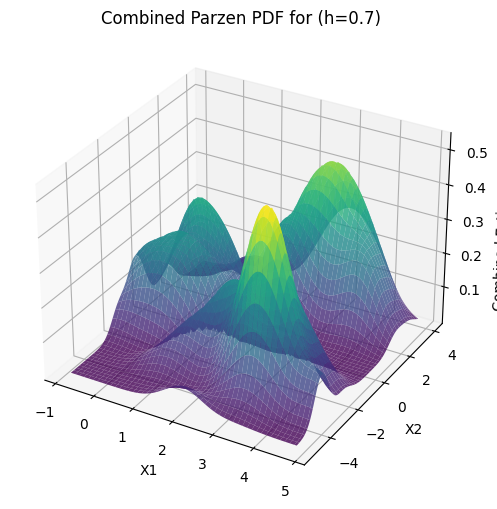

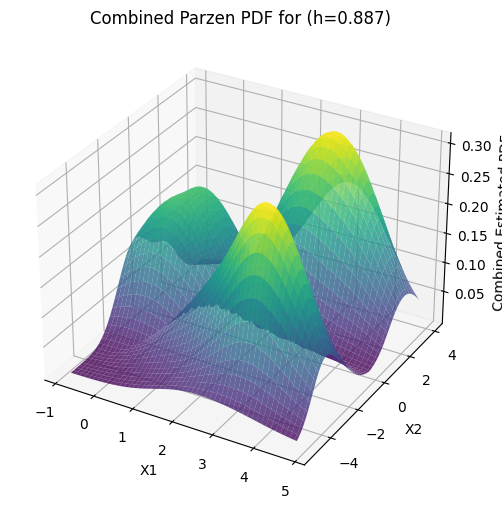

In [ ]:
h_n_values = [0.7 , 0.887]
for h in h_n_values:

    xx, yy, parzen_pdf1 = parzen_pdf(new_data, x_class_1_new, h)
    _, _, parzen_pdf2 = parzen_pdf(new_data, x_class_2_new, h)
    _, _, parzen_pdf3 = parzen_pdf(new_data, x_class_3_new, h)

    combined_pdf = np.maximum(np.maximum(parzen_pdf1, parzen_pdf2), parzen_pdf3)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, combined_pdf, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Combined Estimated PDF')
    ax.set_title(f'Combined Parzen PDF for (h={h})')
    plt.show()

**ΕΡΩΤΗΜΑ Β**

**Μέθοδος knn**

 Η συνάρτηση knn_pdf δημιουργεί ένα γραμμικό grid, υπολογίζει τις αποστάσεις από τα δεδομένα μιας κλάσης προς κάθε σημείο του grid και επιλέγει τα k πλησιέστερα γείτονα, υπολογίζοντας έτσι την ακτίνα και τον όγκο της σφαίρας γύρω από αυτά.Έπειτα υπολογίζει την PDF για κάθε σημείο του grid, με βάσει αυτό τον τύπο  pdf = k / (v * Ν), όπου k o αριθμός των κοντινότερων γειτόνων του σημείου, v ο όγκος γύρω από το σημείο (μεταβλητό μέγεθος σε αυτή τη μέθοδο) και N το πλήθος των δειγμάτων.


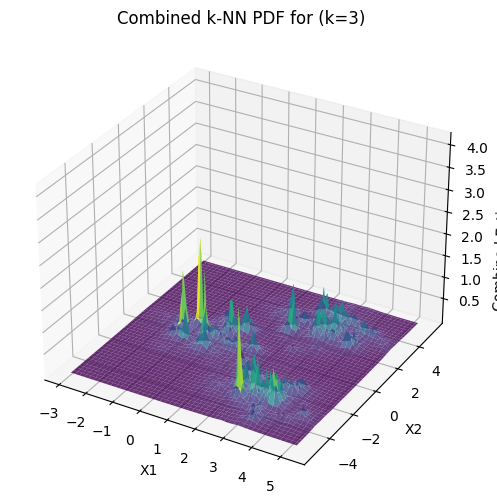

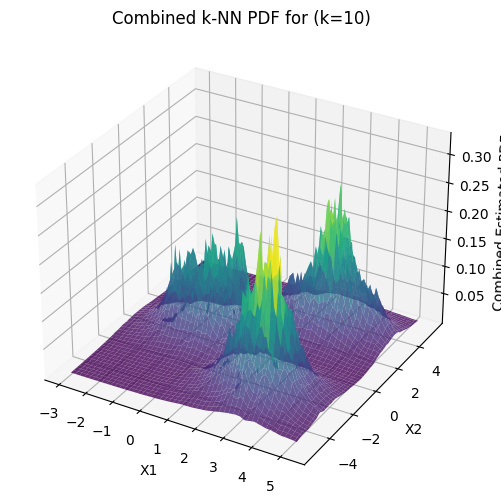

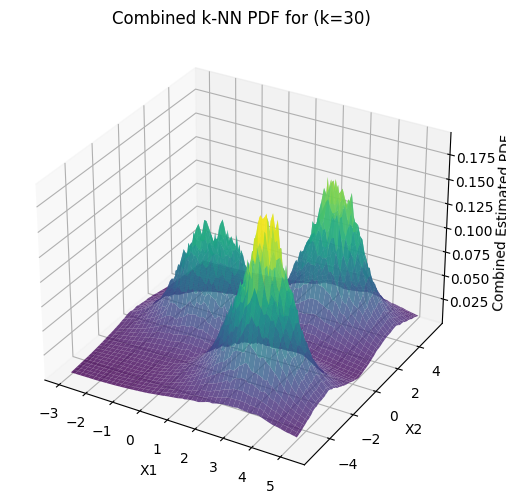

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def knn_pdf(x_total, x_class, k):
    # Δημιουργία ενός κοινού grid για όλο το χώρο
    x1 = np.linspace(x_total[:, 0].min(), x_total[:, 0].max(), 100)
    x2 = np.linspace(x_total[:, 1].min(), x_total[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    X_grid = np.column_stack((X1.ravel(), X2.ravel()))
    N = len(X_grid)

    # Αρχικοποίηση του πίνακα pdf για όλα τα σημεία του grid
    pdf = np.zeros(N)

    # Υπολογισμός της PDF για κάθε σημείο του grid
    for i in range(N):
        # Υπολογισμός των αποστάσεων από το σημείο i του grid σε όλα τα δείγματα της κλάσης x_class
        distances = np.sqrt(np.sum((X_grid[i, :] - x_class) ** 2, axis=1))
        # Ταξινόμηση των αποστάσεων και επιλογή των k πιο κοντινών γειτόνων
        sorted_distances = np.sort(distances)
        k_closest_neighbours = sorted_distances[:k]
        # Υπολογισμός της ακτίνας της σφαίρας που περιλαμβάνει τους k πιο κοντινούς γείτονες
        r = np.max(k_closest_neighbours)
        # Υπολογισμός του όγκου της σφαίρας
        v = np.pi * (r**2)
        # Υπολογισμός της PDF για το σημείο i
        pdf[i] = k / (v * len(x_class))

    # Επιστροφή των συντεταγμένων του grid και της PDF
    return X1, X2, pdf.reshape(X1.shape)



k_values = [3, 10, 30]

#Κλήση της συνάρτησης knn για κάθε κλάση
for k in k_values:
    X1, X2, knn_pdf_class_1 = knn_pdf(x_total, x_class_1, k)
    _, _, knn_pdf_class_2 = knn_pdf(x_total, x_class_2, k)
    _, _, knn_pdf_class_3 = knn_pdf(x_total, x_class_3, k)

    # Συνδυασμός των PDFs σε ένα ενιαίο grid
    combined_pdf = np.maximum(np.maximum(knn_pdf_class_1, knn_pdf_class_2), knn_pdf_class_3)
    #3d αναπαράστασης της Pdf
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, combined_pdf, cmap='viridis', alpha=0.8)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Combined Estimated PDF')
    ax.set_title(f'Combined k-NN PDF for (k={k})')
    plt.show()


**Παρατηρήσεις:**

Μεγαλύτερες τιμές του k οδηγούν σε πιο ομαλοποιημένη εκτίμηση, ενώ μικρότερες τιμές μπορεί να καταγράψουν περισσότερες τοπικές διακυμάνσεις και άρα να φαίνονται πιο θορυβώδεις. Ο διαχωρισμός των κλάσεων γίνεται πιο εμφανής όταν περισσότερα δεδομένα συμμετέχουν στον υπολογισμό της pdf.Η ακτίνα, δηλαδή, της περιοχής μεγαλώνει και πλαισιώνει όλο και περισσότερους γείτονες βοηθώντας έτσι να πυκνώσει ο χώρος των σημείων και άρα να βελτιωθεί η εκτίμηση της πυκνότητας πιθανότητας.



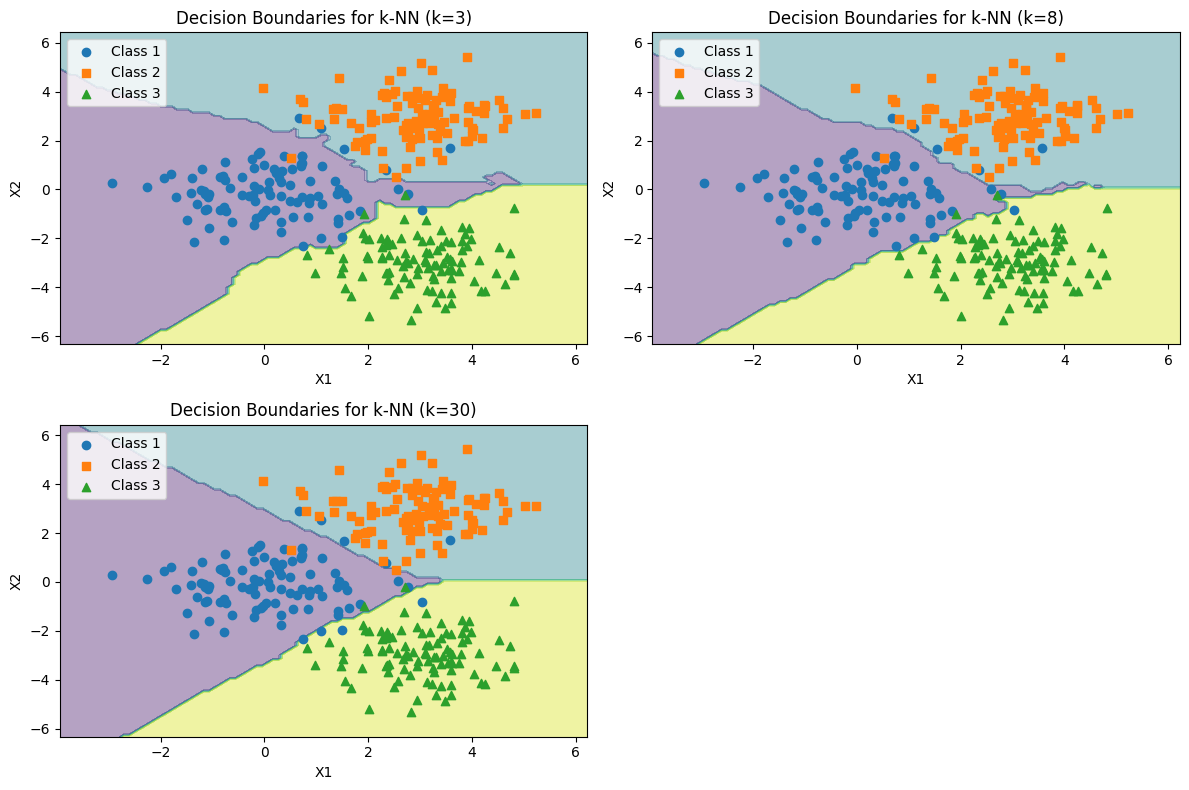

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

def k_nn(data, x_class, k):
    # Ορίζουμε τον αριθμό των σημείων στα δεδομένα
    N = len(data)

    # Αρχικοποίηση ενός πίνακα για τις προβλέψεις
    predictions = np.zeros(N)

    # Επανάληψη για κάθε σημείο στα δεδομένα
    for i in range(N):
        # Υπολογισμός των αποστάσεων από το σημείο σε όλα τα δείγματα της κλάσης
        distances = np.sqrt(np.sum((data[i, :] - x_class[:, :2]) ** 2, axis=1))

        # Ταξινόμηση των αποστάσεων και επιλογή των k πιο κοντινών γειτόνων
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_classes = x_class[sorted_indices, -1]

        # Καταμέτρηση της συχνότητας των κλάσεων μεταξύ των k πιο κοντινών γειτόνων
        class_counter = np.bincount(k_nearest_classes.astype(int))

        # Επιλογή της κλάσης με τη μεγαλύτερη συχνότητα
        predictions[i] = np.argmax(class_counter)

    # Επιστροφή των προβλέψεων
    return predictions


# Meshgrid για τις περιοχές απόφασης
x_min, x_max = x_total[:, 0].min() - 1, x_total[:, 0].max() + 1
y_min, y_max = x_total[:, 1].min() - 1, x_total[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
mesh_data = np.column_stack((xx.ravel(), yy.ravel()))
# Τιμές k
k_values = [3, 8, 30]

# Plot τις περιοχές απόφασης
plt.figure(figsize=(12, 8))
for i, k in enumerate(k_values, 1):
    plt.subplot(2, 2, i)
    Z = k_nn(mesh_data, data, k)
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)

    # Scatter plot
    plt.scatter(x_class_1[:,0], x_class_1[:,1], label='Class 1', marker='o')
    plt.scatter(x_class_2[:,0], x_class_2[:,1], label='Class 2', marker='s')
    plt.scatter(x_class_3[:,0], x_class_3[:,1], label='Class 3', marker='^')

    plt.title(f'Decision Boundaries for k-NN (k={k})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()

plt.tight_layout()
plt.show()

Παρατηρούμε ότι όσο αυξάνεται το k τόσο πιο ευδιάκριτες είναι οι περιοχές απόφασης, τόσο τα σύνορα κάθε κλάσης γίνονται πιο γραμμικά.Αυτό συμβαίνει γιατί
όσο μικραίνει η τιμή του h, η εκτίμηση της PDF αποκτά πιο έντονες λεπτομέρειες σε κάθε δείγμα, καθιστώντας τις ακμές πιο κοφτές και δημιουργώντας πιο  λεπτομερή σύνορα μεταξύ των περιοχών με διαφορετικές πιθανότητες. Αυτό μπορεί να κάνει τις διαχωριστικές επιφάνειες πιο ακριβείς.

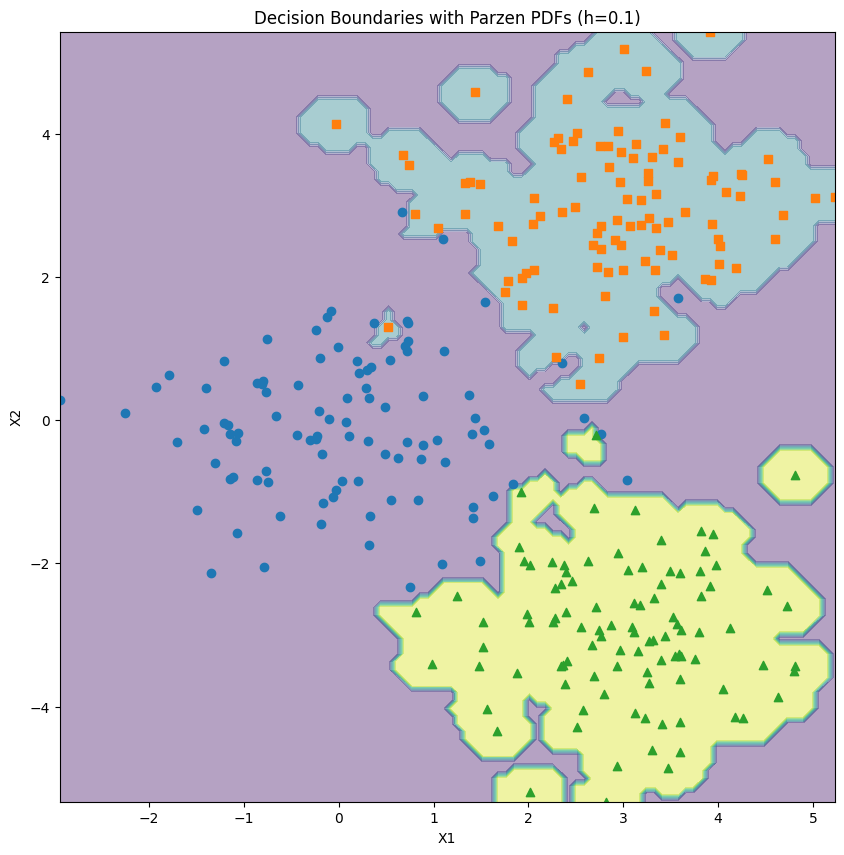

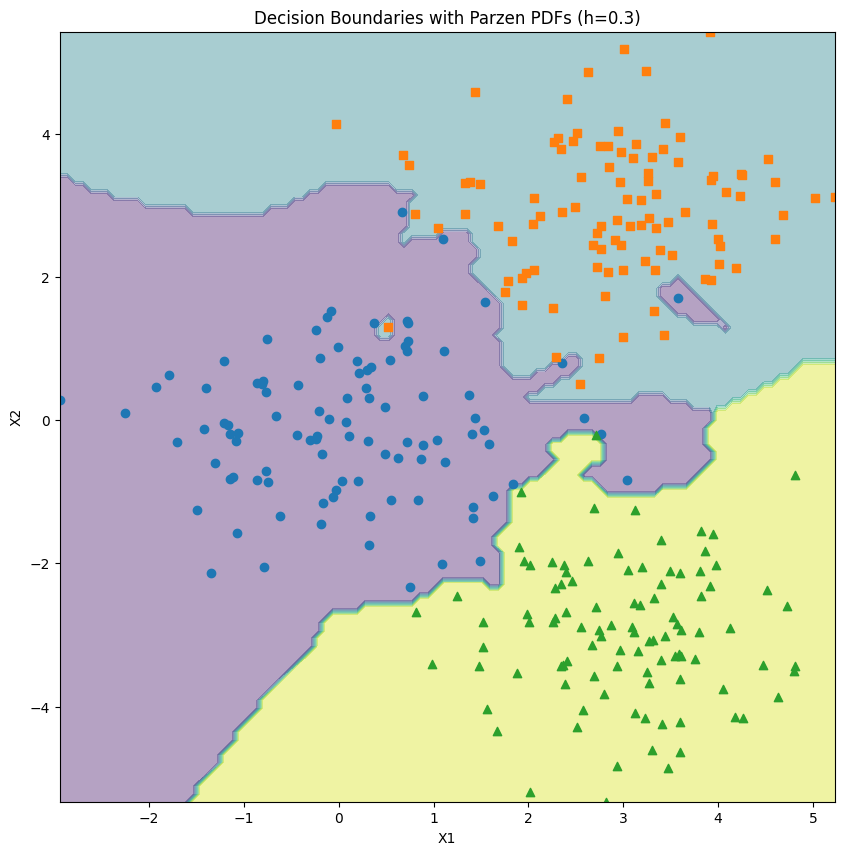

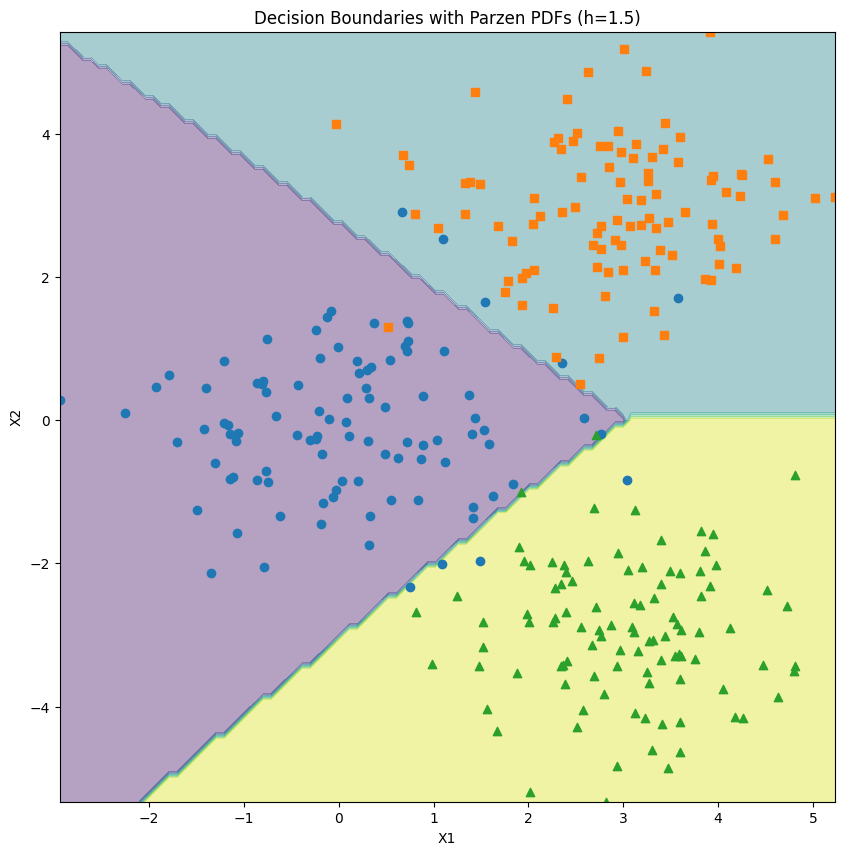

In [ ]:
def bayes_decision_rule(class_pdfs, apriori_probs):
    class_pdfs = np.array(class_pdfs)
    apriori_probs = np.array(apriori_probs)[:, np.newaxis, np.newaxis]  # Αλλαγή των διαστάσεων

    posterior_probs = class_pdfs * apriori_probs

    epsilon = 1e-10
    posterior_probs /= np.sum(posterior_probs, axis=0) + epsilon

    predicted_labels = np.argmax(posterior_probs, axis=0) + 1

    return predicted_labels


h_values = [0.1, 0.3, 1.5]
apriori_probs = [1/3, 1/3, 1/3]
for h in h_values:
    X1_class_1, X2_class_1, pdf_estimate_class_1 = parzen_pdf(x_total, x_class_1, h)
    X1_class_2, X2_class_2, pdf_estimate_class_2 = parzen_pdf(x_total, x_class_2, h)
    X1_class_3, X2_class_3, pdf_estimate_class_3 = parzen_pdf(x_total, x_class_3, h)



    # Grid
    xx, yy = np.meshgrid(np.linspace(x_total[:, 0].min(), x_total[:, 0].max(), 100), np.linspace(x_total[:, 1].min(), x_total[:, 1].max(), 100))

    # Flatten το grid και εφαρμόζουμε τη μέθοδο Parzen PDF και  Bayes decision rule
    decision_result = bayes_decision_rule([pdf_estimate_class_1, pdf_estimate_class_2, pdf_estimate_class_3], apriori_probs)

    # Reshape the decision result to the shape of the meshgrid
    decision_result = decision_result.reshape(xx.shape)

    # Plot τις περιοχές απόφασης και τα δεδομένα των κλάσεων
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, decision_result, cmap='viridis', alpha=0.4)

    # Scatter plot
    plt.scatter(x_class_1[:,0], x_class_1[:,1], label='Class 1', marker='o')
    plt.scatter(x_class_2[:,0], x_class_2[:,1], label='Class 2', marker='s')
    plt.scatter(x_class_3[:,0], x_class_3[:,1], label='Class 3', marker='^')


    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Decision Boundaries with Parzen PDFs (h={h})')
    plt.show()

Όμοια με πριν.
Όσο μικραίνει η τιμή του h, η εκτίμηση της PDF αποκτά πιο έντονες λεπτομέρειες σε κάθε δείγμα, καθιστώντας τις ακμές πιο κοφτές και δημιουργώντας πιο  λεπτομερή σύνορα μεταξύ των περιοχών με διαφορετικές πιθανότητες. Αυτό μπορεί να κάνει τις διαχωριστικές επιφάνειες πιο ακριβείς.

# ΑΣΚΗΣΗ 2

**Α)Batch Perceptron**

Ο αλγόριθμος αυτός ανήκει στην κατηγορία των γραμμικών ταξινομητών. Το μοντέλο ενημερώνει τα βάρη του με βάση τα σφάλματα ταξινόμησης που παρατηρούνται στο training set.



Για κάθε δείγμα στο X, ελέγχεται αν ταξινομείται σωστά με βάση τα τρέχοντα βάρη και την πόλωση.
Αν ένα δείγμα ταξινομείται λανθασμένα (δηλαδή, το γινόμενο της ετικέτας y[i] με το αποτέλεσμα του γινομένου των βαρών με το δείγμα, συν την πόλωση, είναι μικρότερο ή ίσο του μηδενός), τότε τα βάρη και η πόλωση ενημερώνονται.
Η ενημέρωση γίνεται ως εξής:

weights += learning_rate * y[i] * X[i]: Τα βάρη ενημερώνονται με την προσθήκη του γινομένου της ετικέτας του δείγματος, του δείγματος και του ρυθμού μάθησης.
bias += learning_rate * y[i]: Η πόλωση ενημερώνεται με την προσθήκη του γινομένου της ετικέτας του δείγματος και του ρυθμού μάθησης.


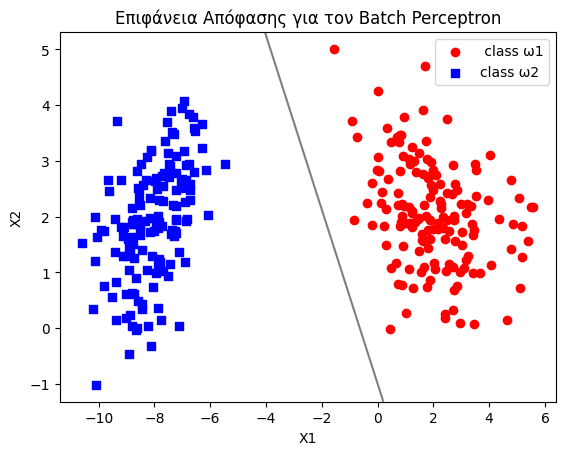

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Δημιουργία παραμέτρων για τις δύο κλάσεις
m1 = [2, 2]
s1 = [[2, -0.5], [-0.5, 1]]

m2 = [-8, 2]
s2 = [[1, 0.5], [0.5, 1]]

x_class_1 = np.random.multivariate_normal(m1, s1, 150)
x_class_2 = np.random.multivariate_normal(m2, s2, 150)

# Ενώνουμε τα δεδομένα και δημιουργούμε ετικέτες για κάθε κλάση
X = np.vstack((x_class_1, x_class_2))
y = np.hstack((np.ones(len(x_class_1)), -np.ones(len(x_class_2))))

# Συνάρτηση για την εκπαίδευση ενός Batch Perceptron
def batch_perceptron(X, y, iterations=100, learning_rate=0.01):
    weights = np.zeros(X.shape[1])
    bias = 0
    for iter in range(iterations):
        for i in range(X.shape[0]):
            # Ενημέρωση βαρών και αλλαγής εάν το δείγμα ταξινομείται στη λάθος κλάση
             if y[i] * (np.dot(X[i], weights) + bias) <= 0:
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]
    return weights, bias

weights, bias = batch_perceptron(X, y)

# Συνάρτηση για την απεικόνιση της επιφάνειας απόφασης
def plot_batch(weights, bias):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Δημιουργία πλέγματος για την αξιολόγηση του μοντέλου
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = np.dot(xy, weights) + bias

    # Απεικόνιση της επιφάνειας απόφασης και των περιθωρίων
    Z = Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# Απεικόνιση των δειγμάτων και της επιφάνειας απόφασης για τον Batch Perceptron
plt.scatter(x_class_1[:, 0], x_class_1[:, 1], color='red', marker='o', label=' class ω1')
plt.scatter(x_class_2[:, 0], x_class_2[:, 1], color='blue', marker='s', label='class ω2')
plot_batch(weights, bias)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Επιφάνεια Απόφασης για τον Batch Perceptron')
plt.show()


**Β) SVM Support Vector Machine**

Ο αλγόριθμος χρησιμοποιεί το σύνολο δεδομένων X και τις αντίστοιχες ετικέτες y για να εκπαιδεύσει τον SVM. Κατά τη διάρκεια της εκπαίδευσης, προσπαθεί να βρει τα βέλτιστα βάρη που θα οδηγήσουν στη δημιουργία μιας επιφάνειας απόφασης που μεγιστοποιεί το περιθώριο μεταξύ των δύο κλάσεων.Για τον σκοπό αυτό λαμβάνει υπόψη του τα σημεία δεδομένων που βρίσκονται πιο κοντά στην επιφάνεια απόφασης,"support vectors" και είναι κρίσιμα για τον καθορισμό της θέσης και της κλίσης της επιφάνειας απόφασης.

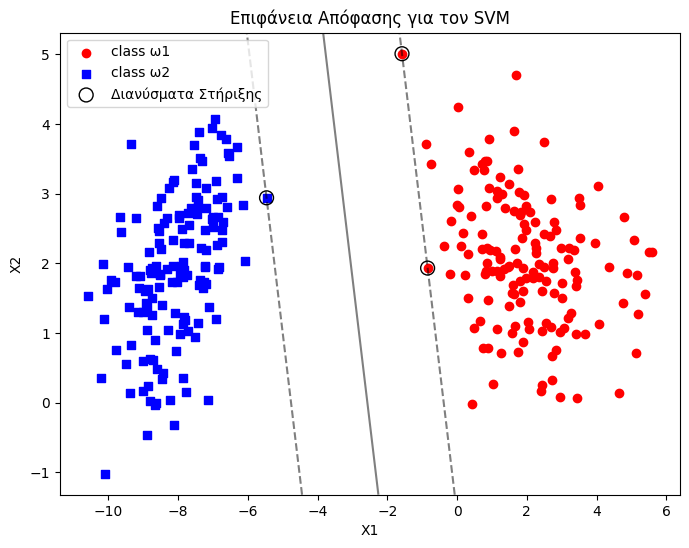

In [ ]:
from sklearn.svm import SVC

# Δεδομένα κάθε κλάσης
X = np.vstack((x_class_1, x_class_2))
y = np.hstack((np.ones(len(x_class_1)), -np.ones(len(x_class_2))))

# Εκπαίδευση ενός γραμμικού SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Συνάρτηση για την απεικόνιση της επιφάνειας απόφασης του SVM
def plot_svm(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Δημιουργία πλέγματος για την αξιολόγηση του μοντέλου
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy)

    # Απεικόνιση της επιφάνειας απόφασης και των περιθωρίων
    Z = Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

# Απεικόνιση των δειγμάτων και της επιφάνειας απόφασης για τον SVM
plt.figure(figsize=(8, 6))
plt.scatter(x_class_1[:, 0], x_class_1[:, 1], color='red', marker='o', label='class ω1')
plt.scatter(x_class_2[:, 0], x_class_2[:, 1], color='blue', marker='s', label='class ω2')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Διανύσματα Στήριξης')
plot_svm(svm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Επιφάνεια Απόφασης για τον SVM')
plt.show()


**Γ.Σχολιασμός αποτελεσμάτων**

Καλύτερος ταξινομητής είναι ο svm γιατί το υπερεπίπεδο που διαχωρίζει τις δύο κλάσεις απέχει περισσότερο από τα δεδομένα. Έχει μεγαλύτερο, δηλαδή, margin. Στον batch δεν λαμβάνεται υπόψη το περιθώριο μεταξύ των κλάσεων. Ουσιαστικά, βρίσκει μια επιφάνεια απόφασης που απλώς διαχωρίζει τις κλάσεις, χωρίς αυτή να είναι η καλύτερη.

Επίσης στον svm το υπερεπίπεδο απέχει την ίδια απόσταση από τα πλησιέστερα σημεία της κάθε κλάσης, ελαχιστοποιώντας έτσι το ρίσκο να ταξινομηθούν λάθος τα δεδομένα.Ο batch είναι πιο ευαίσθητος στο θόρυβο και τα outliers.

Στον  batch χρειάζεται ρύθμιση στο learning rate και τις επαναλήψεις για καλύτερη γενίκευση.Παραπάνω δοκίμασα να αλλάξω το πλήθος των επαναλήψεων και το συμπέρασμα ήταν ότι σε πολύ λιγότερες επαναλήψεις είχε έλθει σε παραπλήσια μορφή υπερεπιπέδου με τη τελική.
Ο svm έχει καλύτερη γενίκευση λόγω της βελτιστοποίησης του περιθωρίου.

Ακόμα, το υπερεπίπεδο του svm είναι μοναδικό,δηλαδή αν αλλάξουμε τα σημεία στο χώρο τα διανύσματα στήριξης παραμένουν αναλλοίωτα.



# ΑΣΚΗΣΗ 3

In [ ]:
import zipfile
import os

# Αποσυμπίεση του αρχείου ZIP που περιέχει το dataset
zip_path = '/content/drive/MyDrive/protupa_ergasia2/wine.zip'
extract_folder = '/content/drive/MyDrive/protupa_ergasia2/wine_dataset'

# Δημιουργία φακέλου για την αποσυμπίεση των αρχείων
os.makedirs(extract_folder, exist_ok=True)

# Αποσυμπίεση του αρχείου
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Εμφάνιση των αποσυμπιεσμένων αρχείων
extracted_files = os.listdir(extract_folder)
extracted_files


['Index', 'wine.names', 'wine.data']

Το dataset φαίνεται να έχει 14 στήλες, όπου η πρώτη στήλη (στήλη 0) είναι η ετικέτα της ποικιλίας κάθε κρασιού και οι υπόλοιπες στήλες αντιπροσωπεύουν τις τιμές των διάφορων χημικών συστατικών.Θα χρησιμοποιηθεί η βιβλιοθήκη pandas γιατί το dataset είναι της μορφής csv.

In [ ]:
import pandas as pd
# Φόρτωση του αρχείου dataset
dataset_path = os.path.join(extract_folder, 'wine.data')
data = pd.read_csv(dataset_path, header=None)  # υποθέτοντας ότι το αρχείο δεν έχει επικεφαλίδα

# Ας δούμε τις πρώτες γραμμές του dataset για να κατανοήσουμε τη δομή του
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Α**)Split του dataset

Θα χρησιμοποιήσουμε  την Scikit-learn για την δημιουργία, την εκπαίδευση και την αξιολόγηση ενός γραμμικού SVM ταξινομητή.

In [ ]:
from sklearn.model_selection import train_test_split

# Δημιουργία νέων λιστών για τα φιλτραρισμένα δεδομένα
X_filtered = []
y_filtered = []

# Φιλτράρισμα χρησιμοποιώντας if
for index, row in data.iterrows():
    if row[0] == 2 or row[0] == 3:  # Έλεγχος αν η ετικέτα είναι 2 ή 3, δηλαδή κατηγορία 2 ή 3
        X_filtered.append(row[1:6].tolist())  # Προσθήκη των πρώτων 5 συστατικών
        y_filtered.append(row[0])  # Προσθήκη της ετικέτας

# Διαχωρισμός σε testing και training set (50% το καθένα από το αρχικό dataset)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.5, stratify=y_filtered, random_state=42)

# Διαχωρισμός του testing set σε testing και validation set (25% το καθένα από το αρχικό dataset, που δεν χρησιμοποιείται για training)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)


**Β)**

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Δοκιμή μερικών τιμών για την παράμετρο C και επιλογή της καλύτερης βάσει της ακρίβειας στο validation set
best_accuracy = 0
best_C = 1
for C in [0.1, 1, 10]:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)
    val_accuracy = svm_classifier.score(X_val, y_val)
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_C = C
print(C)

# Εκπαίδευση του SVM με την καλύτερη τιμή του C
svm_classifier = SVC(kernel='linear', C=best_C)
svm_classifier.fit(X_train, y_train)

# Αξιολόγηση του SVM στο test set
test_accuracy = svm_classifier.score(X_test, y_test)
test_error = 1 - test_accuracy

print("Ακρίβεια στο Test Set:", test_accuracy)
print("Σφάλμα Ταξινόμησης στο Test Set:", test_error)

# Πίνακας συγχυσης για το test set
test_pred = svm_classifier.predict(X_test)
print("Πίνακας συγχυσης:\n", confusion_matrix(y_test, test_pred))


10
Ακρίβεια στο Test Set: 0.7
Σφάλμα Ταξινόμησης στο Test Set: 0.30000000000000004
Πίνακας συγχυσης:
 [[12  6]
 [ 3  9]]


Το σφάλμα ταξινόμησης είναι σχετικά μεγάλο , αλλά αυτό είναι λογικό καθώς χρησιμοποιούνται μόνο τα 5 από τα 13 συστατικά.
Για να δούμε αναλυτικά σε τι οφείλεται αυτή η τιμής του σφάλματος μποροούμε να συμβουλευτούμε τον πίνακα σύγχυσης.
Ο πίνακας σύγχυσης δείχνει πόσες φορές το μοντέλο προέβλεψε σωστά ή λάθος κάθε κλάση. Αυτό περιλαμβάνει τις περιπτώσεις όπου το μοντέλο έχει σωστά ταξινομήσει τα δείγματα (true positives και true negatives) και τις περιπτώσεις όπου το μοντέλο έχει κάνει λάθος (false positives και false negatives).Αναλυτικά:

True Positives (TP): 12

False Positives (FP): 6

False Negatives (FN): 3

True Negatives (TN): 9

**Γ)**

In [ ]:
test_accuracies = []
#5 επαναλήψεις
for i in range(5):
    # Διαχωρισμός σε training set, validation set και testing set με  τυχαίο seed
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, stratify=y, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=i)

    # Εκπαίδευση γραμμικού SVM ταξινομητή
    svm_classifier = SVC(kernel='linear', C = C)
    svm_classifier.fit(X_train, y_train)

    # Αξιολόγηση στο test set
    test_pred = svm_classifier.predict(X_test)
    test_accuracy = np.mean(test_pred == y_test)
    test_accuracies.append(test_accuracy)

# Υπολογισμός της μέσης τιμής και της τυπικής απόκλισης του σφάλματος ταξινόμησης
mean_accuracy = np.mean(test_accuracies)
std_accuracy = np.std(test_accuracies)

mean_accuracy, std_accuracy


(0.75, 0.2091650066335189)

Παρατηρούμε ότι με το τυχαίο τρόπο διαχωρισμού του dataset τα αποτελέσματα βελτιώθηκαν κατα μέσο όρο.

**Δ)**
 Χρησιμοποιούμε έναν μη-γραμμικό SVC με διάφορες συναρτήσεις πυρήνα, και στο τέλος αξιολογούμε  την απόδοσή του στο test set.


In [ ]:
# Επιλογή διαφορετικών συναρτήσεων πυρήνα για δοκιμή
kernels = ['rbf', 'poly', 'sigmoid']

# Αποθήκευση των αποτελεσμάτων για κάθε πυρήνα
kernel_results = {}

for kernel in kernels:
    # Εκπαίδευση του μη-γραμμικού SVM
    non_linear_svm = SVC(kernel=kernel, C=C)
    non_linear_svm.fit(X_train, y_train)

    # Αξιολόγηση στο test set
    test_accuracy = non_linear_svm.score(X_test, y_test)
    kernel_results[kernel] = test_accuracy

# Εύρεση των πυρήνων με την καλύτερη ακρίβεια
max_accuracy = max(kernel_results.values())
best_kernels = [k for k, v in kernel_results.items() if v == max_accuracy]

print(f"Αποτελέσματα για κάθε πυρήνα: {kernel_results}")
print(f"Καλύτεροι πυρήνες με την ίδια ακρίβεια: {best_kernels}")
print(f"Μέγιστη ακρίβεια: {max_accuracy}")
print(f"Σφάλμα Ταξινόμησης: {1 - max_accuracy}")



Αποτελέσματα για κάθε πυρήνα: {'rbf': 0.625, 'poly': 0.625, 'sigmoid': 0.625}
Καλύτεροι πυρήνες με την ίδια ακρίβεια: ['rbf', 'poly', 'sigmoid']
Μέγιστη ακρίβεια: 0.625
Σφάλμα Ταξινόμησης: 0.375



Αναλύοντας τα αποτελέσματα του μη-γραμμικού SVM με διάφορες συναρτήσεις πυρήνα (RBF, Polynomial, και Sigmoid), παρατηρούμε ότι όλοι οι πυρήνες εμφανίζουν την ίδια ακρίβεια 62.5%. Αυτό σημαίνει ότι το πρόβλημα ταξινόμησης μπορεί να μην είναι επηρεάζεται τόσο από την επιλογή του πυρήνα, επειδή τα δεδομένα δεν είναι τόσο περίπλοκα και όλοι οι πυρήνες δεν τα διαχειρίζονται αποτελεσματικά. Επιπλέον, το σφάλμα ταξινόμησης 37.5% είναι σχετικά υψηλό,άρα χρειάζεται να βελτιωθεί.Λογικά χρειάζονται περισσότερα και διαφορετικά δεδομένα,ώστε να γίνεται καλύτερη εκπαίδευση και άρα καλύτερο validation και testing.

**Ε)**
Εκπαιδεύουμε ταξινομητές για το πλήρες πρόβλημα των τριών κλάσεων χρησιμοποιώντας την προσέγγιση ένας-εναντίον-ενός (one-vs-one) με το γραμμικό SVM και υπολογίζουμε τη μέση τιμή του σφάλματος ταξινόμησης χρησιμοποιώντας 5-fold cross validation.

Έχουμε τρεις κλάσεις 0, 1 και 2,άρα  θα δημιουργήσουμε τρεις υποταξινομητές SVM ως εξής:

Υποταξινομητής 1: 0 vs. 1

Υποταξινομητής 2: 0 vs. 2

Υποταξινομητής 3: 1 vs. 2

Κάθε υποταξινομητής εκπαιδεύεται να ξεχωρίζει μεταξύ των δύο κλάσεων. Στη συνέχεια, κατά τη διάρκεια της ταξινόμησης ενός νέου δείγματος, κάθε υποταξινομητής επιλέγει την κλάση που πιστεύει ότι ανήκει το δείγμα. Το τελικό αποτέλεσμα της ταξινόμησης είναι η κατηγορία που συγκέντρωσε τις περισσότερες ψήφους ανάμεσα στους υποταξινομητές.
Έτσι δεν χρειάζεται να εκπαιδεύσουμε έναν μοναδικό ταξινομητή για κάθε ζεύγος κατηγοριών.

Όσον αφορά τη μέση τιμή του σφάλματος ταξινόμησης, το 5-fold cross validation. χρησιμοποιείται για να αξιολογήσει τη γενίκευση του μοντέλου σε ανεξάρτητα δείγματα. Κατά τη διάρκεια της διαδικασίας αυτής, το σύνολο δεδομένων διαιρείται σε πέντε υποσύνολα (folds), και το μοντέλο εκπαιδεύεται πέντε φορές. Κάθε φορά, ένα από τα folds χρησιμοποιείται ως σύνολο ελέγχου, ενώ τα υπόλοιπα χρησιμοποιούνται για εκπαίδευση. Η διαδικασία αυτή επαναλαμβάνεται πέντε φορές, με κάθε fold χρησιμοποιούμενο ακριβώς μία φορά ως σύνολο ελέγχου.Με αυτό τον τρόπο αποφεύγεται ο κίνδυνος για overfitting.


In [ ]:
from sklearn.model_selection import cross_val_score
#a) Δημιουργία νέων λιστών για τα 5 πρώτα συστατικά
X_filtered = []
y_filtered = []

for index, row in data.iterrows():
    X_filtered.append(row[1:6].tolist())  # Προσθήκη των πρώτων 5 συστατικών
    y_filtered.append(row[0])  # Προσθήκη της ετικέτας

# Εκπαίδευση ταξινομητών για το πλήρες πρόβλημα των τριών κλάσεων
# Χρησιμοποιώντας την προσέγγιση ένας-εναντίον-ενός (one-vs-one) με γραμμικό SVM
svm_classifier_5 = SVC(kernel='linear', C=1, decision_function_shape='ovo')

# Υπολογισμός της μέσης τιμής του σφάλματος ταξινόμησης χρησιμοποιώντας 5-fold cross validation
scores_5 = cross_val_score(svm_classifier_5,X_filtered, y_filtered, cv=5)
mean_score_5 = np.mean(scores_5)
error_5 = 1-mean_score_5
print(error_5)

#β) Δημιουργία νέων λιστών για όλα τα συστατικά
X_all = []
y_all = []

for index, row in data.iterrows():
    X_all.append(row[:].tolist())  # Προσθήκη των πρώτων 5 συστατικών
    y_all.append(row[0])  # Προσθήκη της ετικέτας

# Εκπαίδευση ταξινομητών για το πλήρες πρόβλημα των τριών κλάσεων
# Χρησιμοποιώντας την προσέγγιση ένας-εναντίον-ενός (one-vs-one) με γραμμικό SVM
svm_classifier_all = SVC(kernel='linear', C=1, decision_function_shape='ovo')

# Υπολογισμός της μέσης τιμής του σφάλματος ταξινόμησης χρησιμοποιώντας 5-fold cross validation
scores_all = cross_val_score(svm_classifier_all, X_all, y_all, cv=5)
mean_score_all = np.mean(scores_all)
error_all  = 1-mean_score_all
print(error_all)


0.1852380952380953
0.01666666666666683


Όταν χρησιμοποιούμε τα πρώτα 5 χημικά συστατικά, το μέσο σφάλμα ταξινόμησης είναι περίπου 0.185.
Όταν χρησιμοποιούμε όλα τα διαθέσιμα χημικά συστατικά, το μέσο σφάλμα ταξινόμησης είναι περίπου 0.0166.
Άρα όταν χρησιμοποιούμε όλα τα διαθέσιμα χημικά συστατικά έχουμε μικρότερο σφάλμα ταξινόμησης σε σύγκριση με τη χρήση μόνο των πρώτων 5 συστατικών.Αυτό είναι λογικο, καθώς όπως αναφέρθηκε παραπάνω, όσα περισσότερα δεδομένα από κάθε κλάση παρέχουμε τόσο περισσότερες πληροφορίες έχουμε για να γίνει η ταξινόμηση πιο σωστά.

In [ ]:
from sklearn.metrics import confusion_matrix

# Εκπαίδευση του ταξινομητή για τα πρώτα 5 συστατικά
svm_classifier_5.fit(X_filtered, y_filtered)

# Υπολογισμός του πίνακα σύγχυσης για τα πρώτα 5 συστατικά
confusion_matrix_5 = confusion_matrix(y_filtered, svm_classifier_5.predict(X_filtered))
print("Confusion Matrix (για τα 5 συστατικά):\n", confusion_matrix_5)

# Εκπαίδευση του ταξινομητή για όλα τα συστατικά
svm_classifier_all.fit(X_all, y_all)

# Υπολογισμός του πίνακα σύγχυσης για όλα τα συστατικά
confusion_matrix_all = confusion_matrix(y_all, svm_classifier_all.predict(X_all))
print("Confusion Matrix (για όλα τα συστατικά):\n", confusion_matrix_all)



Confusion Matrix (για τα 5 συστατικά):
 [[54  0  5]
 [ 2 61  8]
 [ 4  8 36]]
Confusion Matrix (για όλα τα συστατικά):
 [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


***Χρησιμοποιώντας τα πρώτα 5 συστατικά:***

**Κλάση 0:**

TP: 61

FP: 10

TN: 40

FN: 8

**Κλάση 1:**

TP: 40

FP: 8

TN: 61

FN: 10

Συνολικά, υπάρχουν 61+10=71  δείγματα στο dataset.

Στη κλάση 0 ταξινομούνται σωστά σε 61 περιπτώσεις, ενώ οι υπόλοιπες 10 περιπτώσεις λανθασμένα.

Στη κλάση 1  ταξινομούνται σωστά σε 40 περιπτώσεις, ενώ οι 8 περιπτώσεις λανθασμένα.

***Χρησιμοποιώντας όλα τα συστατικά:***

**Κλάση 0:**

TP: 59

FP: 0

TN: 119

FN: 0

**Κλάση 1:**

TP: 71

FP: 0

TN: 107

FN: 0

**Κλάση 2:**

TP: 48

FP: 0

TN: 130

FN: 0


Συνολικά, υπάρχουν 59+71+48=178 δείγματα στο dataset.

Στη κλάση 0 ταξινομούνται σωστά οι 59 περιπτώσεις και 0 λανθασμένα.

Στη κλάση 1  ταξινομούνται σωστά οι 71 περιπτώσεις και 0 λανθασμένα.

Στη κλάση 2 ταξινομούνται σωστά οι 48 περιπτώσεις και 0 λανθασμένα.

Όταν χρησιμοποιούμε όλα τα χαρακτηριστικά παρατηρούμε ότι η διαχώριση των κλάσεων γίνεται σωστά, οπότε ο ταξινομητής είναι αρκετά αποτελεσματικός.